# Import 

In [2]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Intro

In [3]:
DATA_DIR = Path('..', '..', '..', 'data', 'final', 'public')

In [4]:
train_values = pd.read_csv(DATA_DIR / 'train_values.csv', index_col='building_id')
train_labels = pd.read_csv(DATA_DIR / 'train_labels.csv', index_col='building_id')

It has 38 columns
- 8 columns are object
- 30 columns are int
- only six columns were used in bench_mark

In [5]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

pairplot of int type columns

In [11]:
def sea_pair(icol_num):
    global train_ints
    global train_labels
    sns.pairplot(train_ints.iloc[:, icol_num:icol_num+4].join(train_labels), hue='damage_grade')
    plt.show()

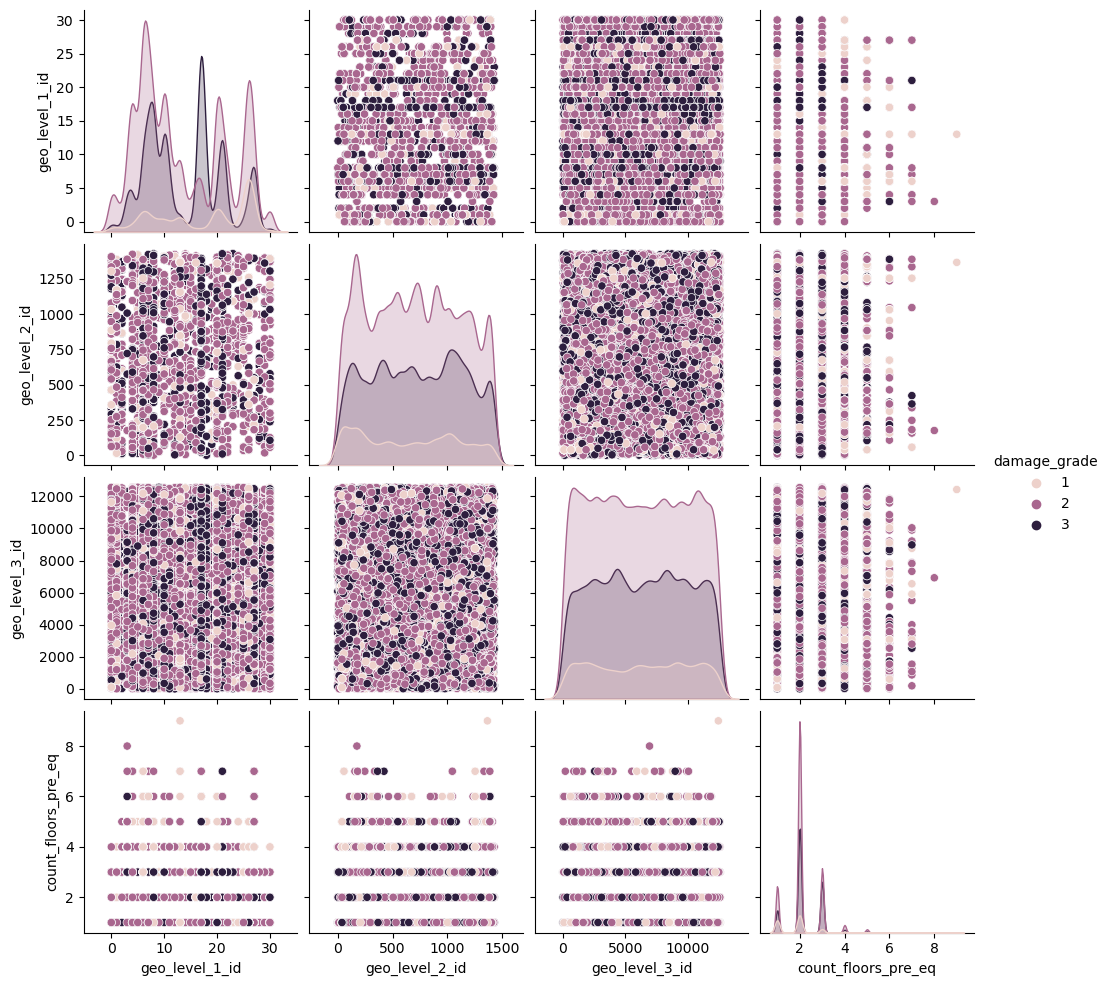

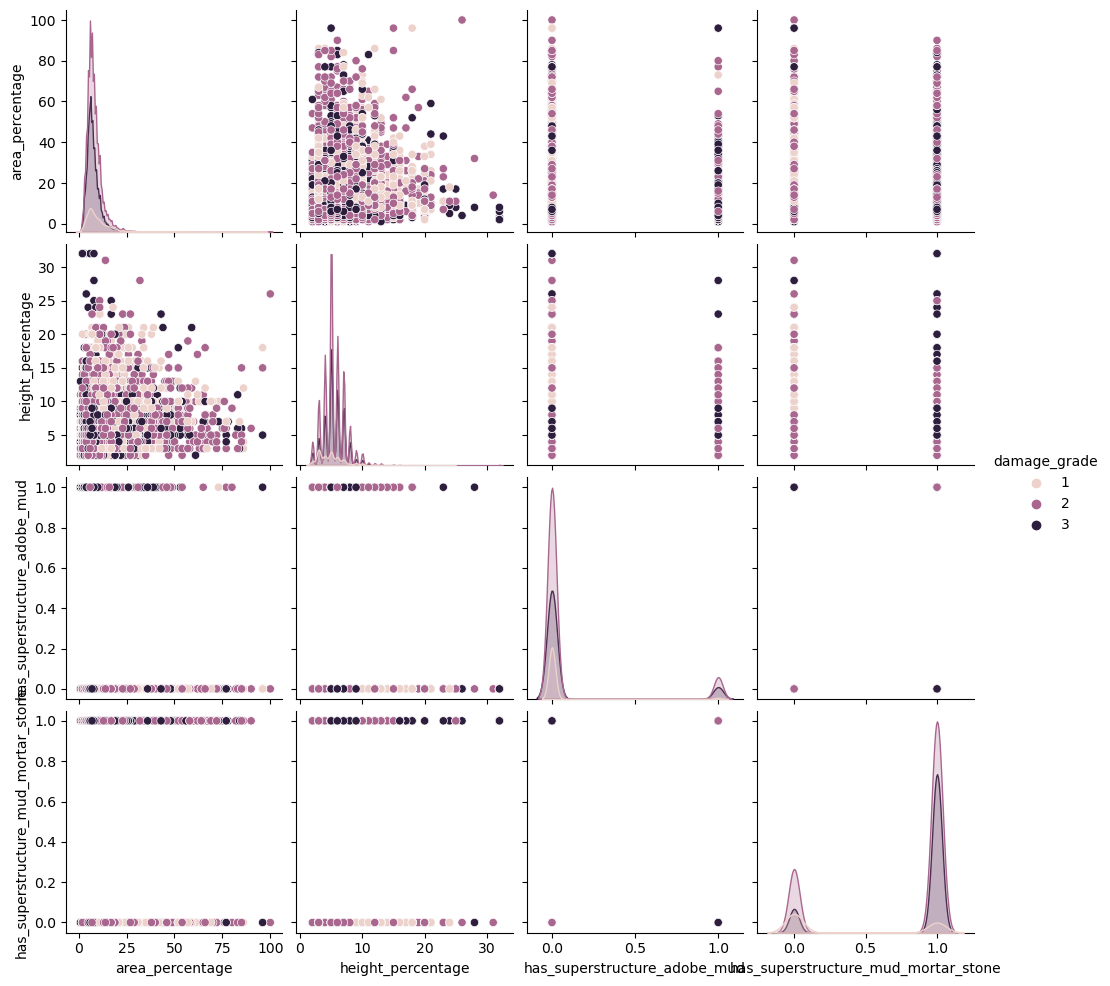

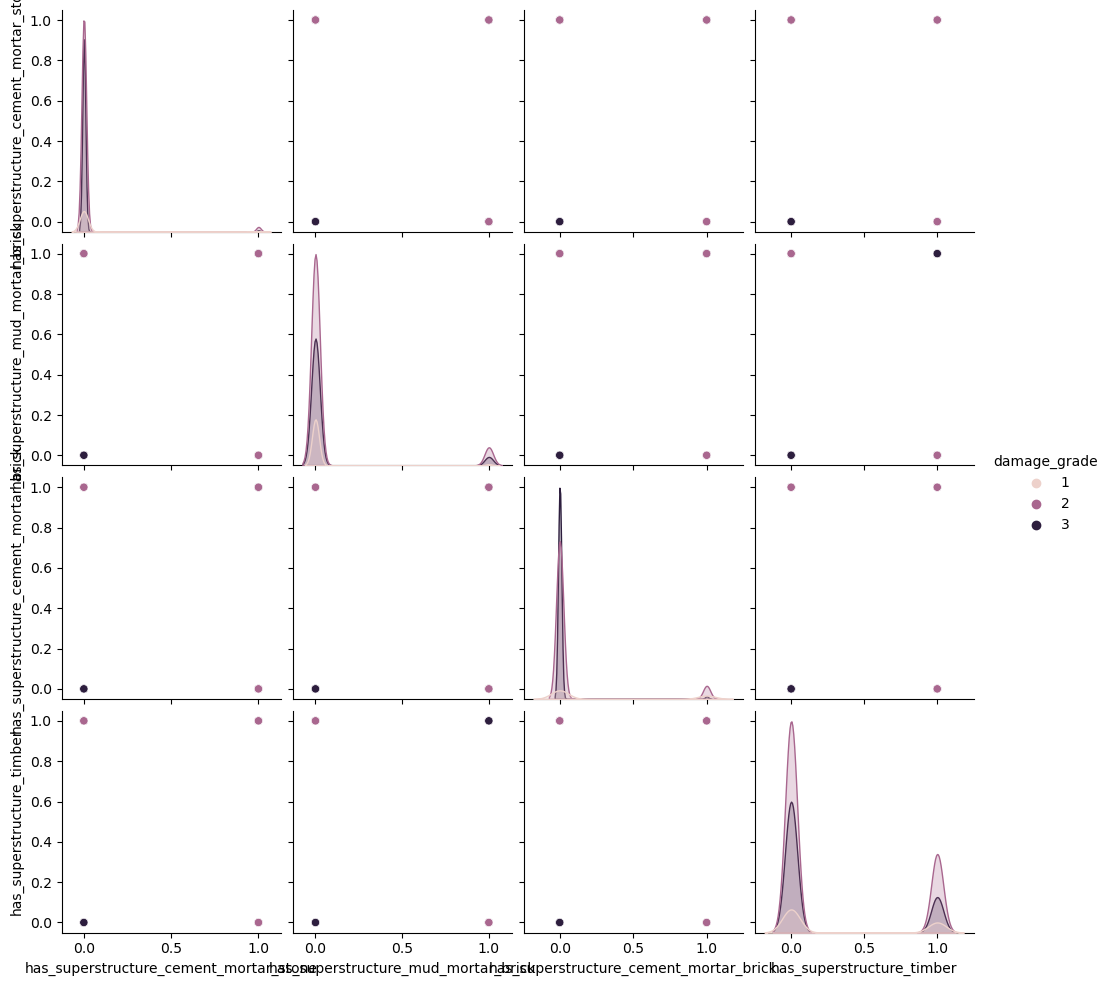

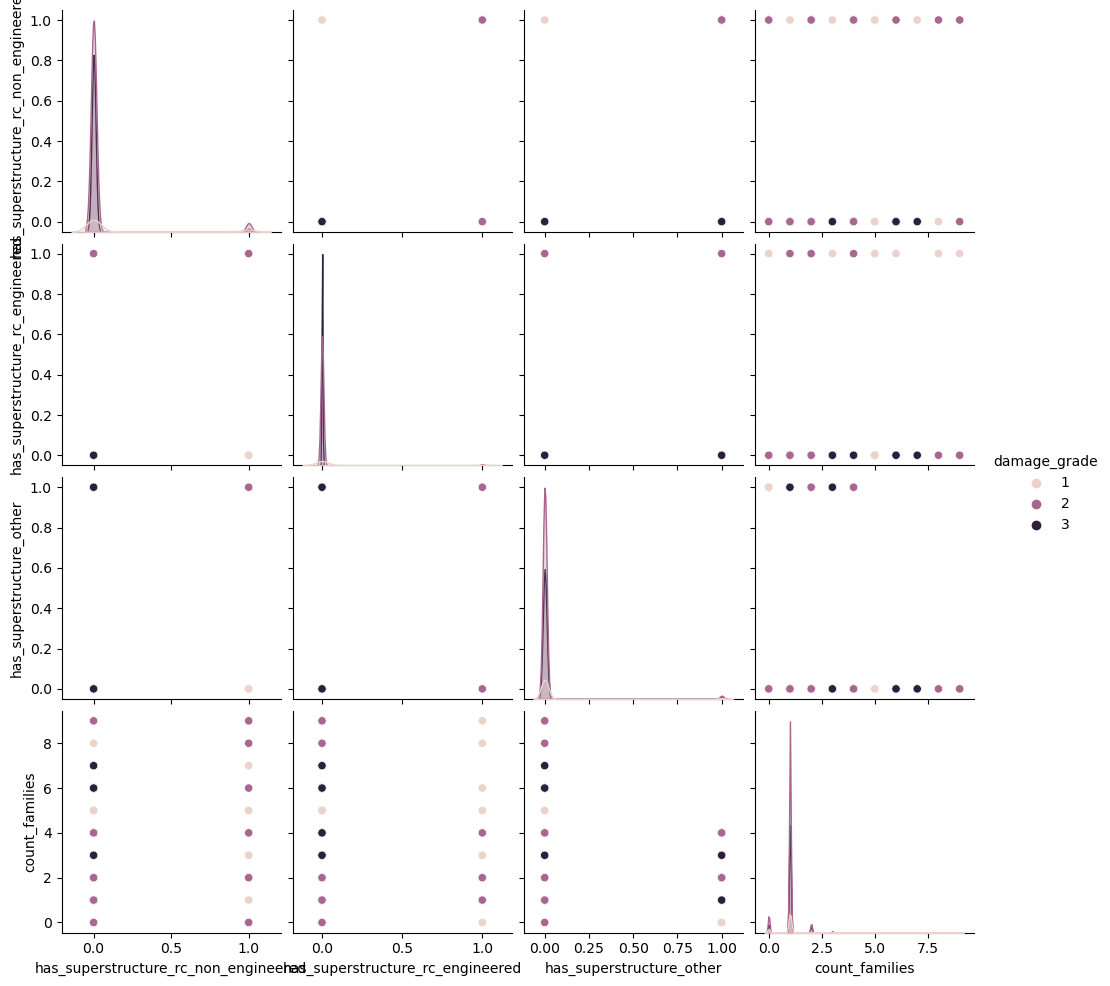

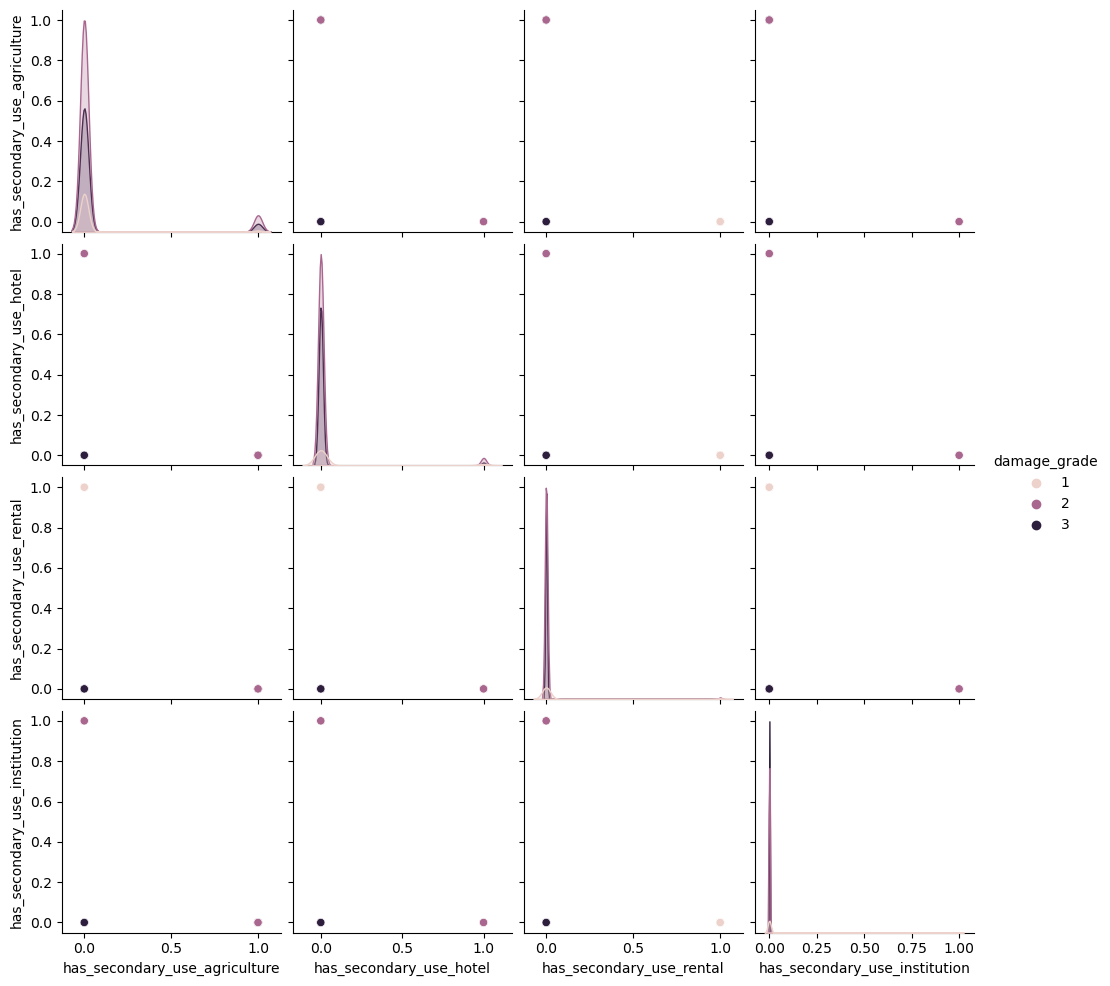

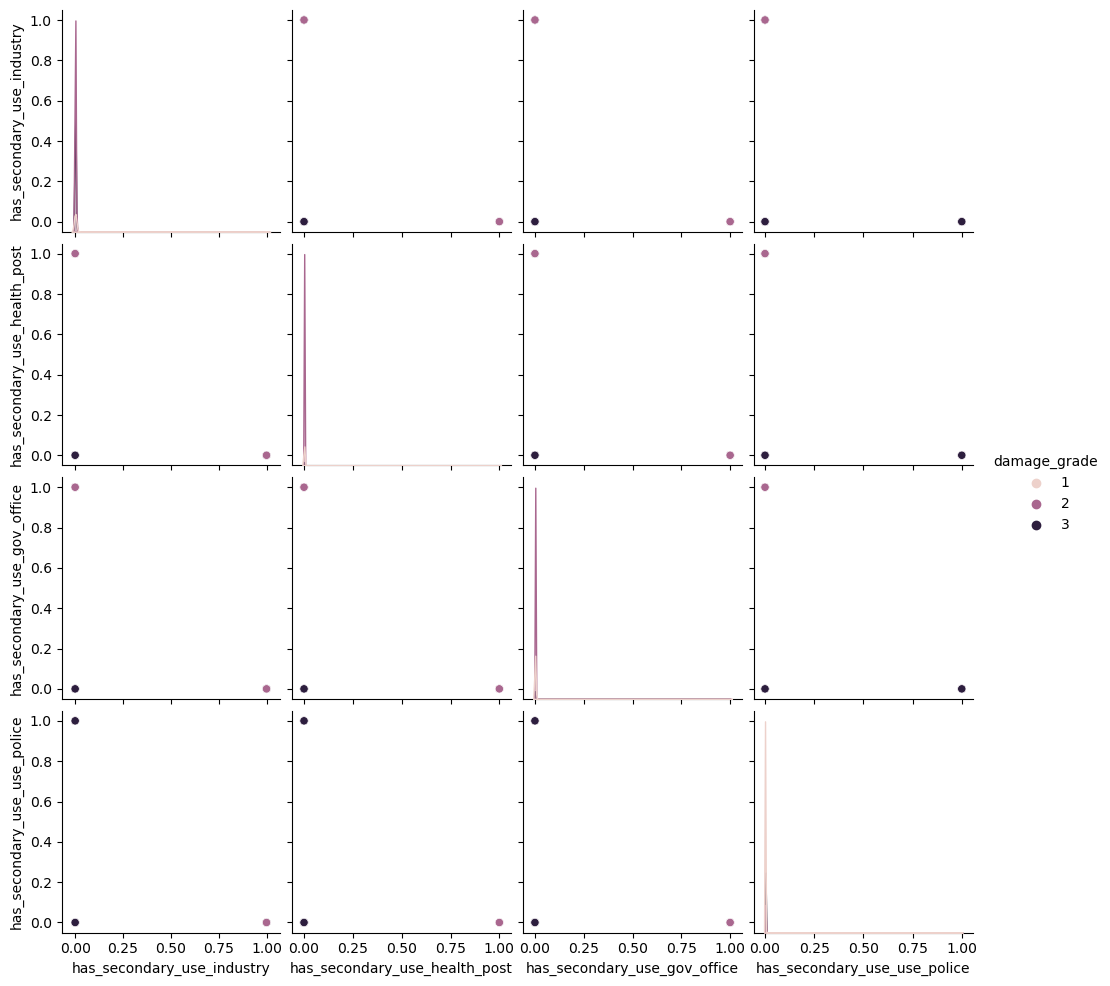

[None, None, None, None, None, None]

In [14]:
train_ints = train_values.select_dtypes(include='int64')
col_len = len(train_ints.columns)

list(map(sea_pair, range(0, col_len, 5)))

In [6]:
train_objects = train_values.select_dtypes(include='object')

foundation_type

roof_type

ground_floor_type

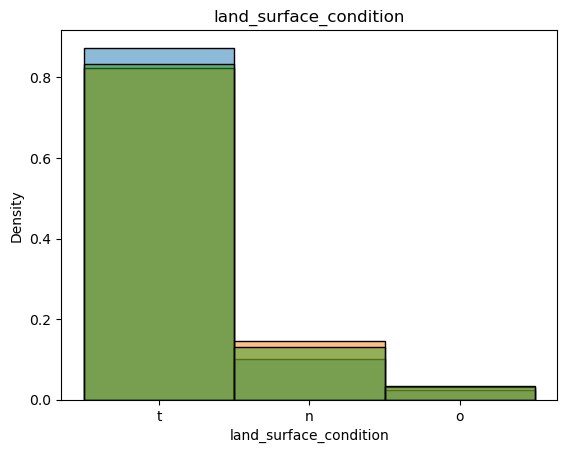

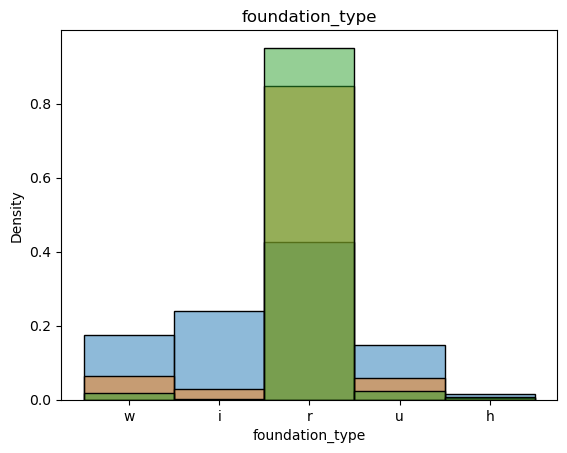

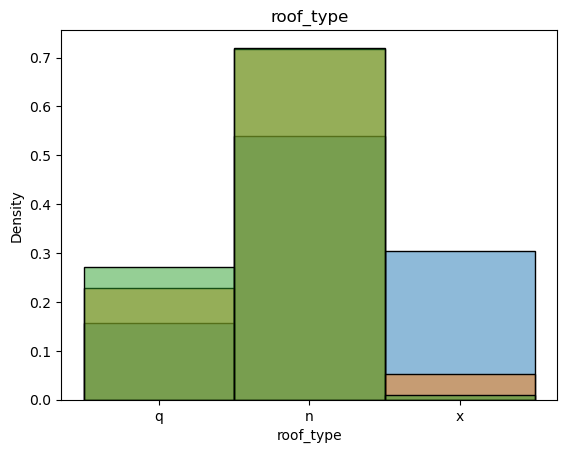

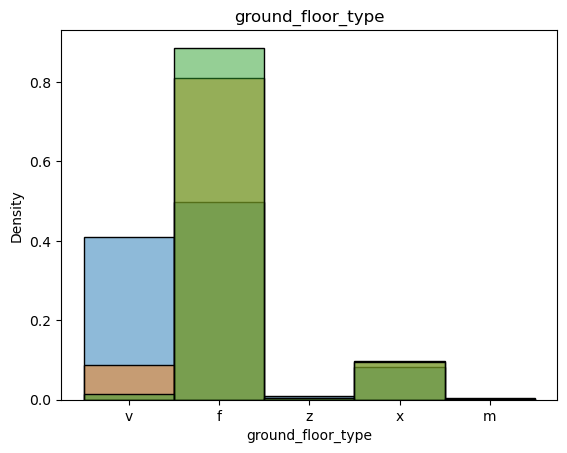

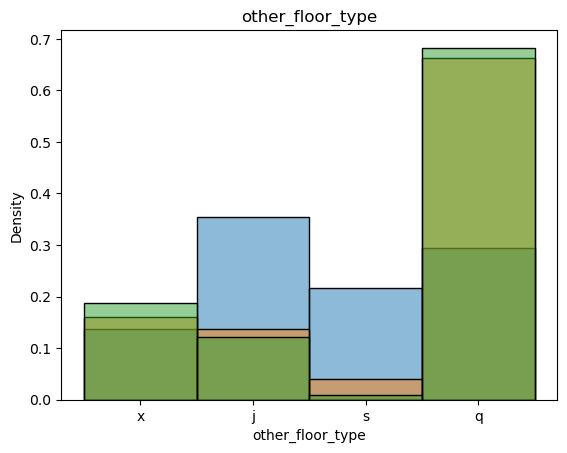

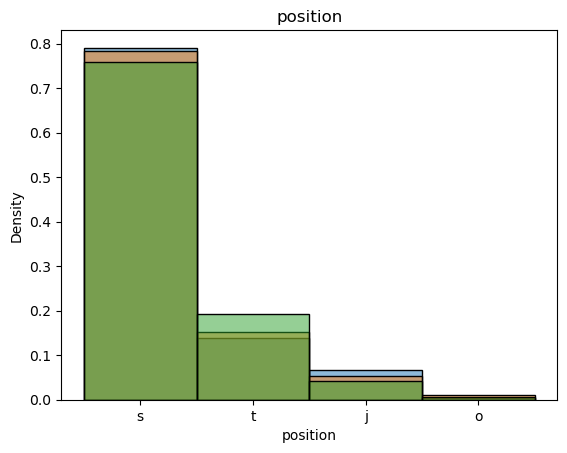

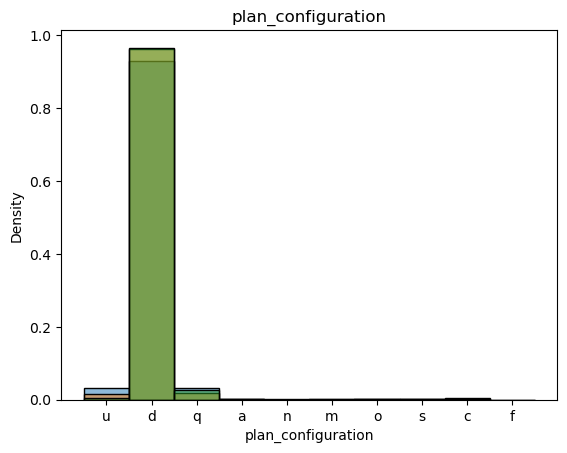

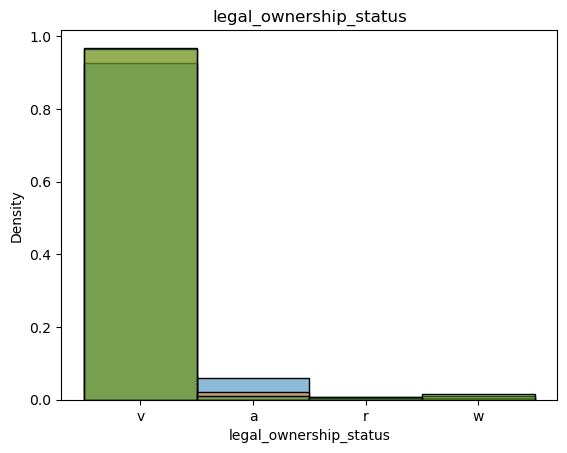

In [16]:
for _col in train_objects.columns:
    for _grade in [1, 2, 3]:
        sns.histplot(data=train_objects.join(train_labels).query('damage_grade == @_grade'), x=_col, stat='density', alpha=0.5)
    plt.title(_col)
    plt.show()